In [14]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

dataset_dir = keras.utils.get_file(fname = 'flower_photos' , origin = dataset_url , cache_dir='.',untar=True)

In [16]:
import pathlib

datadir = pathlib.Path(dataset_dir)
datadir

PosixPath('datasets/flower_photos')

In [17]:
flowers = {'daisy' : list(datadir.glob("daisy/*")),
'dandelion' : list(datadir.glob("dandelion/*")),
'roses' : list(datadir.glob("roses/*")),
'sunflowers' : list(datadir.glob("sunflowers/*")),
'tulips' : list(datadir.glob("tulips/*"))}

lables = {
    'daisy' : 0 ,
    'dandelion' : 1 ,
    'roses' : 2,
    'sunflowers' : 3 ,
    'tulips' :4
}

In [18]:
from pathlib import Path
datadir = Path('/content/datasets/flower_photos/flower_photos/')
print(datadir)

/content/datasets/flower_photos/flower_photos


In [19]:
import os
print(os.listdir(datadir))

['daisy', 'sunflowers', 'dandelion', 'tulips', 'roses', 'LICENSE.txt']


In [20]:
print(list(datadir.glob("daisy/*")))

[PosixPath('/content/datasets/flower_photos/flower_photos/daisy/3588872598_e0f9a1d2a1_m.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/3773181799_5def396456.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/4482623536_b9fb5ae41f_n.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/5773652803_574b51414f_n.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/14272874304_47c0a46f5a.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/433837534_1dbf798b73.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/3957488431_52a447c0e8_m.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/14485782498_fb342ec301.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/4727955343_0bb23ac4ae.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/7288989324_c25d9febbf.jpg'), PosixPath('/content/datasets/flower_photos/flower_photos/daisy/5170544

In [21]:
# import tensorflow as tf
# import tensorflow_datasets as tfds

# dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)

In [22]:
from pathlib import Path
from PIL import Image

# Define the root data directory
datadir = Path('/content/datasets/flower_photos/flower_photos')

# Check if the directory exists
if not datadir.exists():
    raise FileNotFoundError(f"{datadir} does not exist!")

# Reload flowers dictionary
flowers = {
    'daisy': list(datadir.glob("daisy/*")),
    'dandelion': list(datadir.glob("dandelion/*")),
    'roses': list(datadir.glob("roses/*")),
    'sunflowers': list(datadir.glob("sunflowers/*")),
    'tulips': list(datadir.glob("tulips/*"))
}

# Print number of images in each class
for cls, paths in flowers.items():
    print(f"{cls}: {len(paths)} images")

daisy: 633 images
dandelion: 898 images
roses: 641 images
sunflowers: 699 images
tulips: 799 images


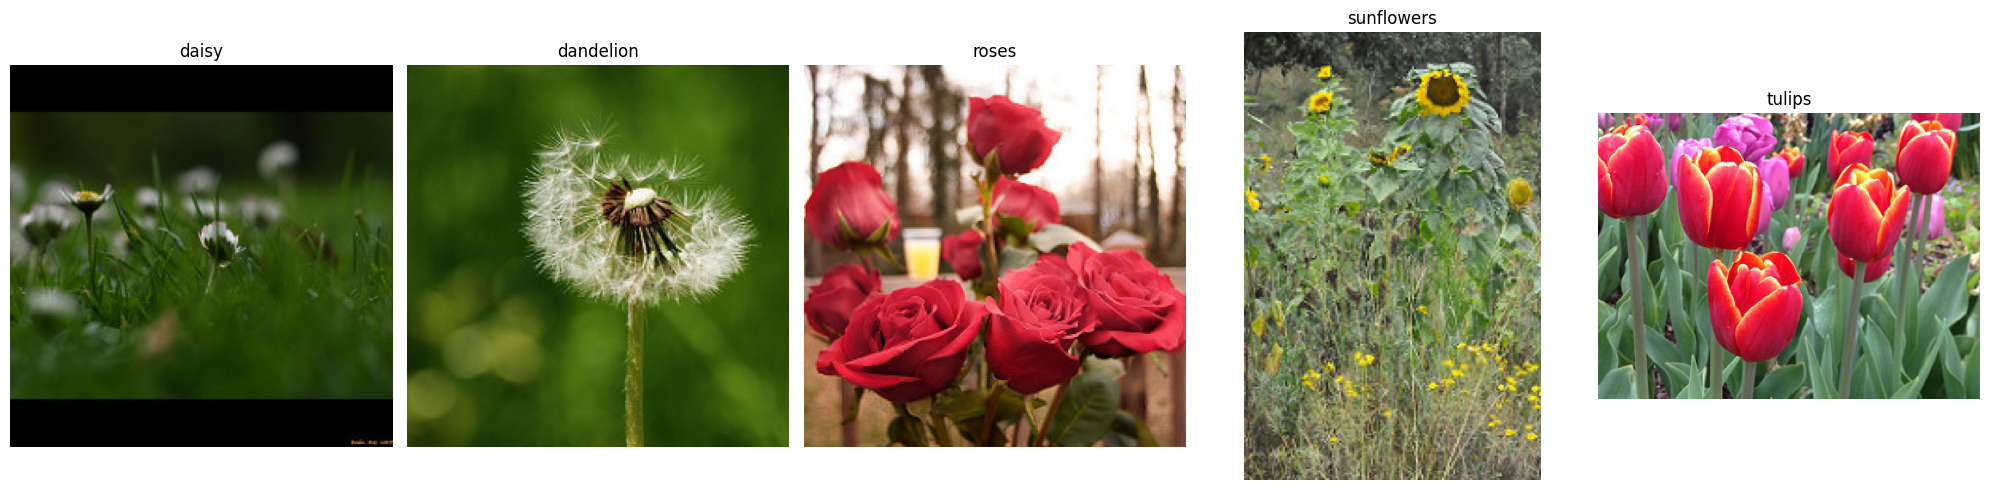

In [23]:
import matplotlib.pyplot as plt

# Plot one sample from each class
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, (cls, paths) in zip(axes, flowers.items()):
    img_path = str(paths[0])  # Get first image path
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis("off")
plt.tight_layout()
plt.show()

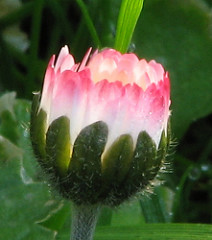

In [ ]:
PIL.Image.open(str(flowers['daisy'][44]))

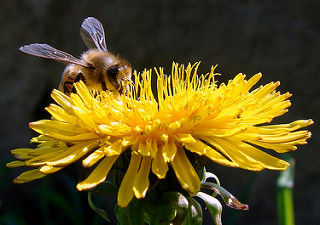

In [ ]:
PIL.Image.open(str(flowers['dandelion'][27]))

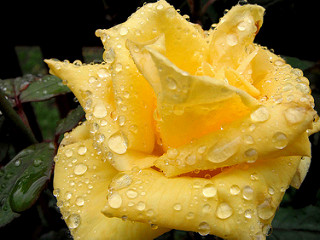

In [ ]:
PIL.Image.open(str(flowers['roses'][27]))

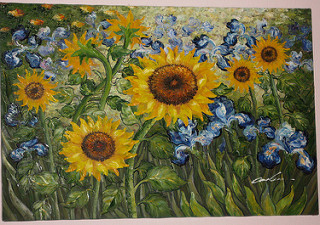

In [ ]:
PIL.Image.open(str(flowers['sunflowers'][29]))

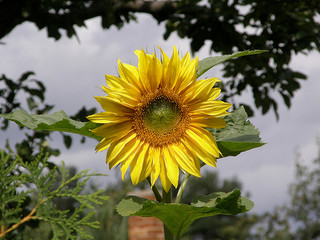

In [ ]:
PIL.Image.open(str(flowers['sunflowers'][90]))

In [24]:
#preprocessing pipeline using TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
img_size = (180, 180)
batch_size = 32

# Use ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    datadir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    datadir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [8]:
# ما هو Overfitting؟
# هو عندما يتعلم النموذج التفاصيل المحددة للبيانات التدريبية جيدًا جدًا، لكنه لا يعمل بشكل جيد على البيانات الجديدة .
# تظهر هذه المشكلة عندما تكون:

# دقة التدريب عالية
# دقة التحقق منخفضة

# إضافة Data Augmentation
# لزيادة تنوع البيانات أثناء التدريب
# تقوم هذه الطبقة بتوليد نسخ متنوعة من الصور أثناء التدريب.
# تساعد في تقليل الإفراط في التخصص (Overfitting) .
# لا تعمل أثناء مرحلة التحقق أو الاختبار.
# قلب الصورة أفقيًا (مثل انعكاسها).
# دوران خفيف للصورة (حتى 20%).
# تقريب جزئي للصورة (Zoom).
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

In [ ]:
#  عدد قليل من الصور
# إذا كان لديك عدد قليل من الصور لكل فئة، فإن النموذج يحفظها بدلًا من تعلم الميزات العامة.
#  بنية الشبكة معقدة أكثر من اللازم
# 3 طبقات Conv + Dense(512) قد تكون كبيرة بالنسبة لعدد الصور.
#  عدم استخدام Data Augmentation
# بدون توسيع بيانات، لا يتعرض النموذج لتباين كافٍ في الصور.
#  Dropout بنسبة 50% فقط
# قد لا يكون كافيًا لمنع الإفراط في التخصص.


# Conv2D(32, (3,3), activation='relu') :
# طبقة تلافيفية (Convolutional Layer) .
# تتعلم ميزات محلية من الصورة مثل الحواف والزوايا.
# تحتوي على 32 مرشح (filter) أو ميزة (feature map) .
# كل مرشح حجمه 3×3 بكسل.
# استخدام وظيفة التنشيط ReLU لتحويل القيم السالبة إلى صفر.

#  الدخل:
# صورة بحجم (180, 180, 3) (RGB)
#  الخرج:
# مجموعة من الميزات بحجم (178, 178, 32) (لأن 3×3 أقل من 180×180، ينقص 1 من كل بعد)

# MaxPooling2D(2,2)
#  الوظيفة:
# تقليل الأبعاد المكانية (Downsampling)
# تأخذ أقصى قيمة من كل منطقة 2×2.
# تقلل من عدد البيانات وبالتالي تقلل الإفراط في التخصص وتسرّع الحسابات.
# من (178, 178, 32) إلى (89, 89, 32)

# Conv2D(64, (3,3), activation='relu')
#  الوظيفة:
# طبقة تلافيفية ثانية.
# تتعلم ميزات أكثر تعقيدًا باستخدام 64 مرشحًا.

# MaxPooling2D(2,2)
#  الوظيفة:
# تقليل الأبعاد مرة أخرى.
# 📦 الخرج:
# (43, 43, 64)

# Conv2D(128, (3,3), activation='relu')
#  الوظيفة:
# طبقة تلافيفية ثالثة.
# تتعلم ميزات أكثر تعقيدًا باستخدام 128 مرشحًا.
#  الخرج:
# (41, 41, 128)

# MaxPooling2D(2,2)
#  الوظيفة:
# تقليل الأبعاد مرة أخرى.
#  الخرج:
# (20, 20, 128)

# Conv2D(128, (3,3), activation='relu')
#  الوظيفة:
# طبقة تلافيفية رابعة.
# تتعلم ميزات متقدمة إضافية.
#  الخرج:
# (18, 18, 128)

#  MaxPooling2D(2,2)
#  الوظيفة:
# تقليل الأبعاد مرة أخيرة.
#  الخرج:
# (9, 9, 128)

# Flatten()
#  الوظيفة:
# تحويل المصفوفة ثلاثية الأبعاد إلى متجه خطي واحد.
# تجهيز البيانات للطبقة الكثيفة (Dense).
# متجه بحجم: 9 × 9 × 128 = 10368 عنصر

# Dense(512, activation='relu')
#  الوظيفة:
# طبقة عصبية كثيفة (Full Connected Layer).
# تتعلم الأنماط من الميزات المستخرجة سابقًا.
# 512 وحدة عصبية.
#  الخرج:
# متجه بحجم 512

# Dropout(0.6)
#  الوظيفة:
# منع الإفراط في التخصص .
# تطفئ عشوائيًا 60% من الوحدات في كل دفعة تدريبية.
#  الخرج:
# نفس الحجم: 512، لكن بعض القيم تم إيقافها مؤقتًا

# Dense(5, activation='softmax')
#  الوظيفة:
# الطبقة النهائية للتصنيف.
# تُرجع احتمالات لكل فئة من الفئات الخمس.
# استخدام softmax لتحويل القيم إلى احتمالات بين 0 و1.
#  الخرج:
# متجه بحجم 5 (احتمالات لكل فئة)

# التلافيف المتعددة : لاستخراج ميزات من المستويات المختلفة (من البسيطة إلى المعقدة).
# Pooling المتكرر : لتقليل الأبعاد وتقليل الحمل الحسابي.
# Flatten + Dense : لربط الميزات مع التصنيف النهائي.
# Dropout : لتجنب Overfitting.
# Data Augmentation : زيادة تنوع البيانات أثناء التدريب.

In [25]:
#Build a Simple CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    augmentation,

    Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),  # إضافة طبقة إضافية لتقليل الأبعاد أكثر

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.6),  # زيادة_dropout قليلاً
    Dense(5, activation='softmax')
])
# استخدام Learning Rate منخفض مع Adam
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
# زيادة عدد Epochs + Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# Train the model
history = model.fit(
    train_gen,
    epochs=50,  # زيادة عدد الإيبوكات
    validation_data=val_gen,
    callbacks=[early_stop]
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.2865 - loss: 1.5605 - val_accuracy: 0.4282 - val_loss: 1.3408
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.4791 - loss: 1.2373 - val_accuracy: 0.4405 - val_loss: 1.2815
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.5220 - loss: 1.1276 - val_accuracy: 0.5663 - val_loss: 1.1390
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.5891 - loss: 1.0372 - val_accuracy: 0.5718 - val_loss: 1.1266
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.6029 - loss: 1.0036 - val_accuracy: 0.5896 - val_loss: 1.0578
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.6179 - loss: 0.9480 - val_accuracy: 0.6129 - val_loss: 1.0285
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.6388 - loss: 0.9388 - val_accuracy: 0.6512 - val_loss: 0.9520
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.6491 - loss: 0.8796 - val_accuracy: 0.6238 

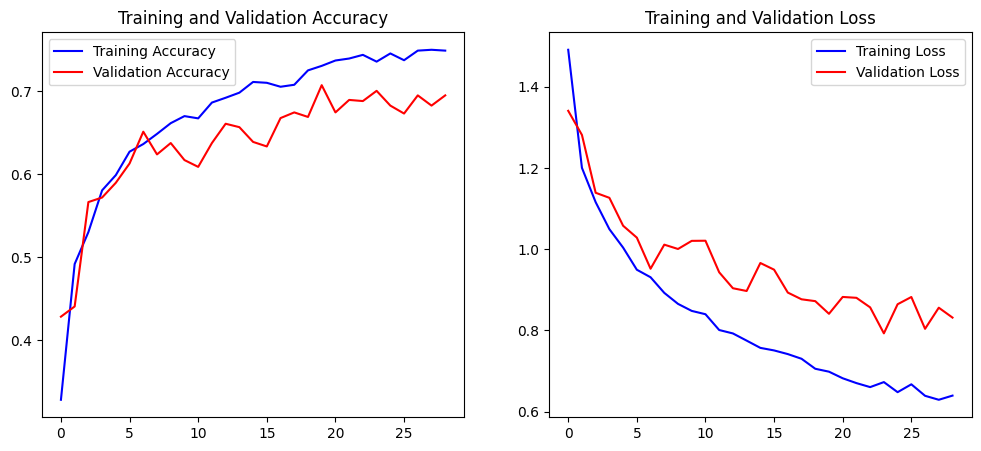

In [27]:
# رسم المنحنى لتحليل Overfitting
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [28]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

#overfitting

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7196 - loss: 0.7507
Validation Loss: 0.7927852272987366
Validation Accuracy: 0.7004104256629944


In [29]:
model1 = Sequential([
    augmentation,

    Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),  # إضافة طبقة إضافية لتقليل الأبعاد أكثر
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),  # إضافة طبقة إضافية لتقليل الأبعاد أكثر


    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.6),  # زيادة_dropout قليلاً
    Dense(5, activation='softmax')
])
# استخدام Learning Rate منخفض مع Adam
model1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
# زيادة عدد Epochs + Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# Train the model
history1 = model1.fit(
    train_gen,
    epochs=50,  # زيادة عدد الإيبوكات
    validation_data=val_gen,
    callbacks=[early_stop]
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.2643 - loss: 1.5782 - val_accuracy: 0.3844 - val_loss: 1.3493
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.4600 - loss: 1.2567 - val_accuracy: 0.4747 - val_loss: 1.2210
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.4975 - loss: 1.1663 - val_accuracy: 0.4966 - val_loss: 1.1679
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5459 - loss: 1.0994 - val_accuracy: 0.4993 - val_loss: 1.1846
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5838 - loss: 1.0624 - val_accuracy: 0.5445 - val_loss: 1.0697
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.6009 - loss: 0.9925 - val_accuracy: 0.5445 - val_loss: 1.0753
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.6196 - loss: 0.9480 - val_accuracy: 0.5540 - val_loss: 1.1063
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.6227 - loss: 0.9586 - val_accuracy: 0.5910

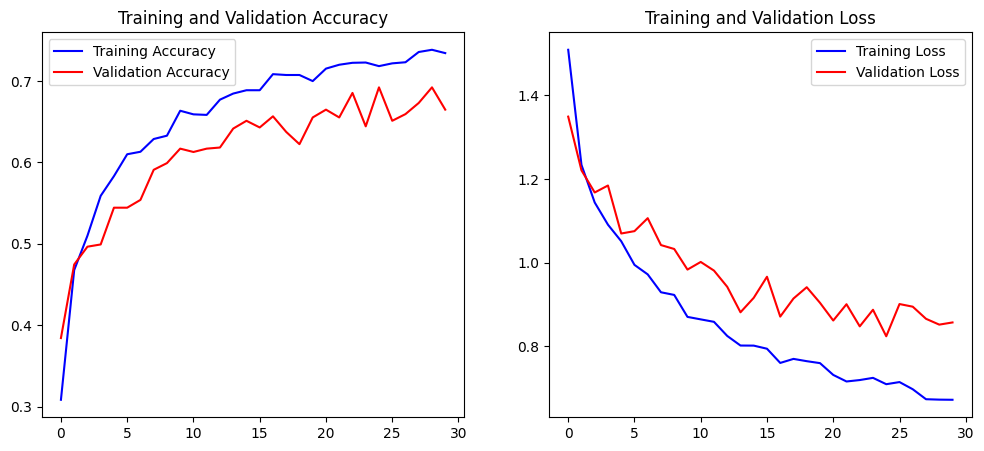

In [31]:
plot_history(history1)

In [32]:
val_loss, val_accuracy = model1.evaluate(val_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6965 - loss: 0.8395
Validation Loss: 0.8237759470939636
Validation Accuracy: 0.6922024488449097


In [ ]:
# detect overfitting (if validation accuracy drops while training improves

In [ ]:
# ما هو النقل التدريبي؟
# النقل التدريبي هو استخدام نموذج تم تدريبه مسبقًا على مجموعة بيانات كبيرة (مثل ImageNet) لحل مشكلة جديدة أصغر. يساعد ذلك في توفير الوقت وتحسين الأداء عندما يكون لدينا عدد قليل من الصور.

# IMG_SIZE: حجم الصور التي سيتم إدخالها إلى النموذج (180×180 بكسل).
# BATCH_SIZE: عدد الصور التي يتم معالجتها في كل دفعة أثناء التدريب.
# CHANNELS: عدد القنوات في الصورة (RGB = 3 قنوات).
# تحميل MobileNetV2 بدون الطبقات العلوية
# MobileNetV2: نموذج خفيف الوزن ومناسب للتطبيقات على الأجهزة المحمولة.
# input_shape: تحديد شكل الإدخال (ارتفاع، عرض، قنوات).
# include_top=False: لا تشمل الطبقة الأخيرة (التي تُستخدم لتصنيف 1000 فئة في ImageNet).
# weights='imagenet': استخدام الأوزان المدربة مسبقًا على ImageNet.
# تجميد النموذج الأساسي (Freezing)
# base_model.trainable = False
# لماذا؟
# لتجميد طبقات MobileNetV2 بحيث لا تتغير أوزانها أثناء التدريب.
# نحن فقط سنقوم بتدريب الطبقات الجديدة التي سنضيفها فوقه.

# شرح الطبقات:
# base_model : الطبقات المأخوذة من MobileNetV2 (مخرجاتها ستكون ميزات متقدمة للصورة).
# GlobalAveragePooling2D() :
# تقلل البُعد المكاني للصور وتنتج متجهًا واحدًا لكل قناة.
# بديل للـ Flatten، لكنه يقلل عدد المعلمات ويقلل من الاحتمالات للإفراط في التخصيص (Overfitting).

# Dense(512, activation='relu') :
# طبقة متصلة كثيفة تحتوي على 512 وحدة.
# تُستخدم لتعلم الأنماط من الميزات المستخرجة.
# Dropout(0.5) :
# تطفئ عشوائيًا 50% من الوحدات في كل دفعة.
# تمنع الإفراط في التخصيص.
# Dense(5, activation='softmax') :
# الطبقة النهائية للتصنيف.
# إذا كانت لديك 5 فئات (classes)، فهي تُرجع احتمالات لكل فئة باستخدام softmax.
# optimizer='adam': خوارزمية تحسين ذكية وشائعة الاستخدام.
# loss='categorical_crossentropy': الدالة المناسبة للتصنيف متعدد الفئات مع تشفير one-hot.
# metrics=['accuracy']: قياس دقة النموذج أثناء التدريب والتحقق.

# train_gen: مولد البيانات للتدريب (عادة من نوع ImageDataGenerator).
# epochs=10: عدد المرات التي سيمر فيها النموذج عبر جميع البيانات.
# validation_data=val_gen: مولد بيانات التحقق (لحساب الدقة والخسارة على بيانات غير مرئية).
# IMG_SIZE[0] يمثل الارتفاع (height) الصورة.
# IMG_SIZE[1] يمثل العرض (width) الصورة.
#  النموذج يتوقع أن تكون الصور المدخلة بحجم:

# ارتفاع: 180 بكسل
# عرض: 180 بكسل
# عدد القنوات (CHANNELS): 3 (أي صور RGB بالألوان)
# ✅ IMG_SIZE[0] = ارتفاع الصورة (مثلاً 180)
# ✅ IMG_SIZE[1] = عرض الصورة (مثلاً 180)
# ✅ (IMG_SIZE[0], IMG_SIZE[1], CHANNELS) = شكل الإدخال النهائي للصورة

In [33]:
#Use Transfer Learning (Using MobileNetV2)
#transfer learning with MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

IMG_SIZE = (180, 180)
BATCH_SIZE = 32
CHANNELS = 3

# Load pre-trained MobileNetV2 without top layers
base_model = MobileNetV2(
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], CHANNELS),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False

# Build transfer learning model
tl_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

# Compile
tl_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
tl_history = tl_model.fit(train_gen, epochs=10, validation_data=val_gen)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 191ms/step - accuracy: 0.6500 - loss: 1.0286 - val_accuracy: 0.8304 - val_loss: 0.4639
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8648 - loss: 0.3764 - val_accuracy: 0.8577 - val_loss: 0.4084
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9019 - loss: 0.2730 - val_accuracy: 0.8646 - val_loss: 0.3955
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9240 - loss: 0.2102 - val_accuracy: 0.8605 - val_loss: 0.4250
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9326 - loss: 0.1835 - val_accuracy: 0.8331 - val_loss: 0.4784
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9518 - loss: 0.1330 - val_accuracy: 0.8413 - val_loss: 0.4852
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9605 - loss: 0.1274 - val_accuracy: 0.8372 - val_loss: 0.5007
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accura

In [34]:
# Evaluate transfer learning model
tl_loss, tl_acc = tl_model.evaluate(val_gen)
print(f"Transfer Learning - Validation Loss: {tl_loss}")
print(f"Transfer Learning - Validation Accuracy: {tl_acc}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8668 - loss: 0.4636
Transfer Learning - Validation Loss: 0.4965461194515228
Transfer Learning - Validation Accuracy: 0.8618330955505371


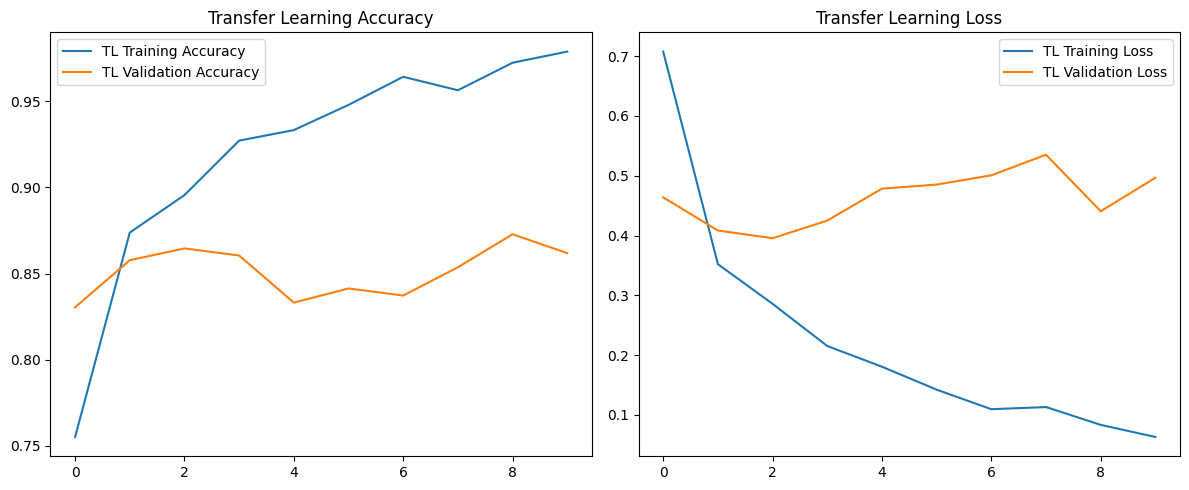

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tl_history.history['accuracy'], label='TL Training Accuracy')
plt.plot(tl_history.history['val_accuracy'], label='TL Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tl_history.history['loss'], label='TL Training Loss')
plt.plot(tl_history.history['val_loss'], label='TL Validation Loss')
plt.title('Transfer Learning Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
print("Custom CNN Accuracy:", val_accuracy)
print("Transfer Learning Accuracy:", tl_acc)

Custom CNN Accuracy: 0.6922024488449097
Transfer Learning Accuracy: 0.8618330955505371


In [ ]:
# Unfreezing top layers of MobileNetV2 for fine-tuning.
# Adding data augmentation to improve generalization.
# Trying other pretrained models , like EfficientNetB0 and ResNet50.

In [ ]:
# tl_model.layers[0]: أول طبقة في النموذج هي base_model (MobileNetV2).
# base_model.trainable = True: نعيد تفعيل إمكانية التدريب للنموذج الأساسي كاملاً، لكننا سنختار بعد ذلك أي طبقات سنُفعّل بالفعل.
# إلغاء تجميد الطبقات العليا فقط
# نحن لا نُفعّلون كل الطبقات، بل فقط آخر 20 طبقة من MobileNetV2.
# هذه الطبقات تكون عادة أكثر تخصصًا وترتبط بميزات متقدمة يمكن أن تكون مفيدة لصورك المحددة.
# نستخدم -20: للوصول إلى آخر 20 طبقة باستخدام المؤشر السالب.
# لماذا لا نُفعّل كل الطبقات؟
# لأن الطبقات الدنيا في MobileNetV2 تحوي ميزات عامة (مثل الحواف والأشكال)، وهي مفيدة لأي نوع صور. أما الطبقات العليا فهي أكثر تخصصًا، لذلك من المنطقي تعديلها
# لماذا معدل تعلم منخفض؟
# لأننا نقوم بتغيير أوزان نموذج تم تدريبه مسبقًا.
# إذا استخدمنا معدل تعلم مرتفع، فقد يفسد التدريب ما تعلمه النموذج من قبل.
# 1e-5 هو قيمة شائعة جدًا في التعديل الدقيق.
# نحن نواصل تدريب النموذج لمدة 10 إيبوكات أخرى.
# يتم تحديث الأوزان لكل الطبقات القابلة للتدريب (الطباقي الجديدة + آخر 20 طبقة من MobileNetV2).
# يتم حساب الخسارة والدقة على بيانات التحقق (val_gen) في كل إيبوك.

# Transfer Learning الأولى
# فقط الطبقات الجديدة
# أعلى (مثل 1e-3)
# بناء تصنيف جديد على ميزات موجودة
# Fine-Tuning الثانية
# الطبقات الجديدة + الطبقات العليا من MobileNetV2
# منخفض (مثل 1e-5)
# تخصيص الميزات العالية المستوى لبياناتك

In [37]:
# # Fine-Tune MobileNetV2: Unfreeze Top Layers
# # After initial training with the base model frozen, we can unfreeze some top layers and train again with a lower learning rate .
# # Reuse the previous transfer learning model
base_model = tl_model.layers[0]
base_model.trainable = True

# Fine-tune from this layer onwards (unfreeze top N layers)
for layer in base_model.layers[-20:]:
    layer.trainable = True  # unfreeze

# Recompile with lower learning rate
tl_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training
fine_tune_history = tl_model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 360ms/step - accuracy: 0.7563 - loss: 0.7443 - val_accuracy: 0.8632 - val_loss: 0.5210
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8545 - loss: 0.4148 - val_accuracy: 0.8632 - val_loss: 0.5098
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8949 - loss: 0.2976 - val_accuracy: 0.8632 - val_loss: 0.4947
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9185 - loss: 0.2331 - val_accuracy: 0.8646 - val_loss: 0.4884
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9266 - loss: 0.2030 - val_accuracy: 0.8687 - val_loss: 0.4781
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9452 - loss: 0.1521 - val_accuracy: 0.8659 - val_loss: 0.4714
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9478 - loss: 0.1444 - val_accuracy: 0.8659 - val_loss: 0.4673
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9614 - loss: 0.1148 - val_accuracy: 

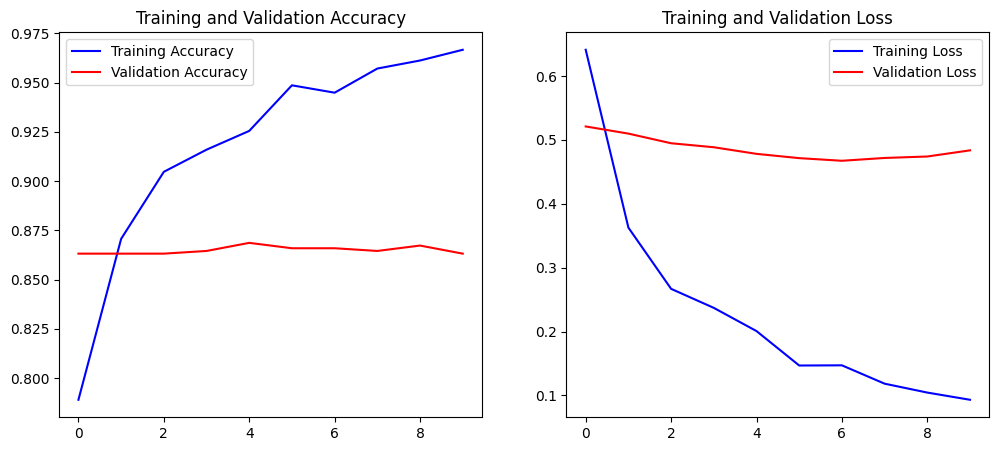

In [38]:
plot_history(fine_tune_history)

In [ ]:
# Add Data Augmentation
# Data augmentation helps reduce overfitting by applying random transformations during training.

# from tensorflow.keras import layers, Sequential

# augmentation = Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.2),
#     layers.RandomContrast(0.2),
# ])

In [39]:
# # بناء نموذج يتضمن التوسعة + باقي النموذج
# model3 = models.Sequential([
#     augmentation,
#     base_model,                    # النموذج الأساسي (MobileNetV2)
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(5, activation='softmax')
# ])

In [40]:
# model3.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# history3 = model3.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 52s 245ms/step - accuracy: 0.6514 - loss: 0.9196 - val_accuracy: 0.5458 - val_loss: 4.6269
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 209ms/step - accuracy: 0.8221 - loss: 0.5136 - val_accuracy: 0.3146 - val_loss: 8.9446
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.8490 - loss: 0.4723 - val_accuracy: 0.4569 - val_loss: 4.6980
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.8540 - loss: 0.4193 - val_accuracy: 0.2763 - val_loss: 12.0765
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.8660 - loss: 0.3920 - val_accuracy: 0.2886 - val_loss: 11.5901
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.8709 - loss: 0.3762 - val_accuracy: 0.2544 - val_loss: 15.7574
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.8997 - loss: 0.3260 - val_accuracy: 0.3051 - val_loss: 11.7496
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.9023 - loss: 0.2768 - val_

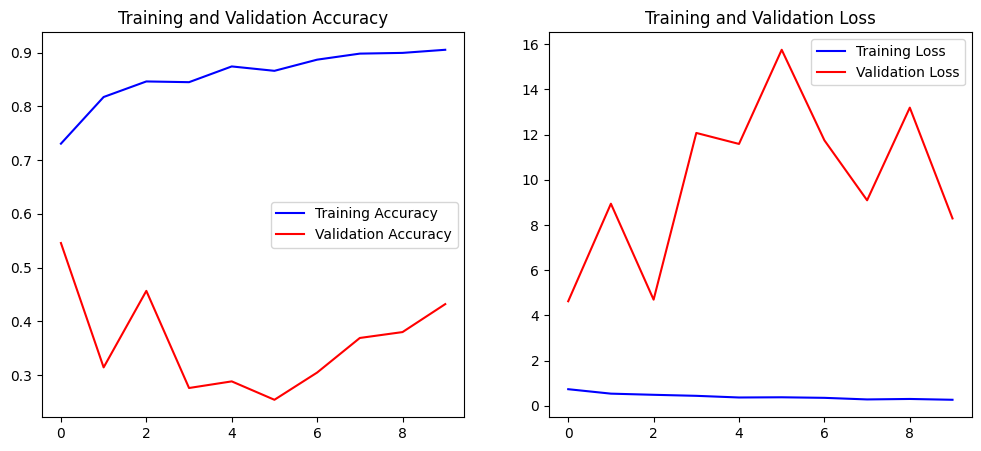

In [41]:
# plot_history(history3)

In [ ]:
#This ensures every training batch gets randomly augmented on the fly.

# نموذج EfficientNetB0 ، وهو نموذج قوي جدًا ويُستخدم بشكل واسع في تصنيف الصور.
# MobileNetV2 يعمل على صور 180×180.
# EfficientNetB0 يتوقع صور بحجم 224×224.
# هذا يعني أن الصور تم إعادة تغيير حجمها، وقد يؤدي ذلك إلى فقدان أو تشويه بعض الميزات المهمة إذا كانت الصور الأصلية صغيرة جدًا.

In [42]:
#  EfficientNetB0
from tensorflow.keras.applications import EfficientNetB0

IMG_SIZE_EFF = (224, 224)  # EfficientNet expects 224x224 input

# Resize images accordingly
train_gen_eff = datagen.flow_from_directory(
    datadir,
    target_size=IMG_SIZE_EFF,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen_eff = datagen.flow_from_directory(
    datadir,
    target_size=IMG_SIZE_EFF,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load EfficientNet
base_model_eff = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model_eff.trainable = False

# Build model
eff_model = Sequential([
    base_model_eff,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

eff_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
eff_history = eff_model.fit(train_gen_eff, epochs=10, validation_data=val_gen_eff)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 316ms/step - accuracy: 0.2205 - loss: 1.6994 - val_accuracy: 0.2175 - val_loss: 1.6062
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.2427 - loss: 1.6059 - val_accuracy: 0.2449 - val_loss: 1.6022
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2400 - loss: 1.6017 - val_accuracy: 0.2449 - val_loss: 1.6000
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.2448 - loss: 1.6015 - val_accuracy: 0.2449 - val_loss: 1.6037
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.2257 - loss: 1.6030 - val_accuracy: 0.2449 - val_loss: 1.6002
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.2411 - loss: 1.6011 - val_accuracy: 0.2449 - val_loss: 1.6008
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.2493 - loss: 1.6012 - val_accura

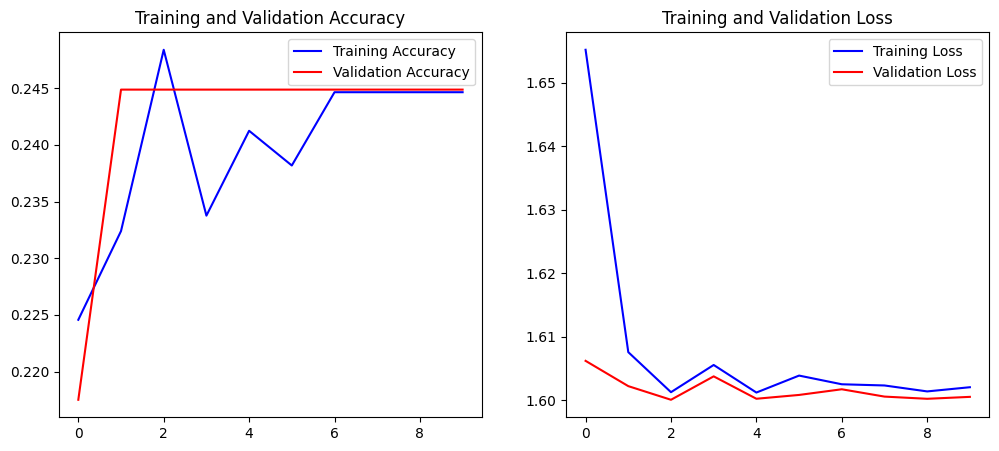

In [43]:
plot_history(eff_history)

In [44]:
# إلغاء تجميد بعض الطبقات العليا:
from tensorflow.keras import optimizers
base_model_eff.trainable = True

# إلغاء تجميد آخر 30 طبقة مثلاً
for layer in base_model_eff.layers[-30:]:
    layer.trainable = True

# إعادة تجميع النموذج بمعدل تعلم منخفض
eff_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# الاستمرار بالتدريب
eff_history_fine = eff_model.fit(train_gen_eff, epochs=10, validation_data=val_gen_eff)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 131s 636ms/step - accuracy: 0.2627 - loss: 1.8611 - val_accuracy: 0.2503 - val_loss: 1.5988
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.4100 - loss: 1.4433 - val_accuracy: 0.2476 - val_loss: 1.6003
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.5209 - loss: 1.2048 - val_accuracy: 0.2681 - val_loss: 1.5904
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.6415 - loss: 0.9942 - val_accuracy: 0.2996 - val_loss: 1.5077
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.7098 - loss: 0.8397 - val_accuracy: 0.4542 - val_loss: 1.2532
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.7549 - loss: 0.7551 - val_accuracy: 0.6101 - val_loss: 0.9694
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.7801 - loss: 0.6478 - val_accuracy: 0.7497 - val_loss: 0.7472
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.8081 - loss: 0.5668 - val_acc

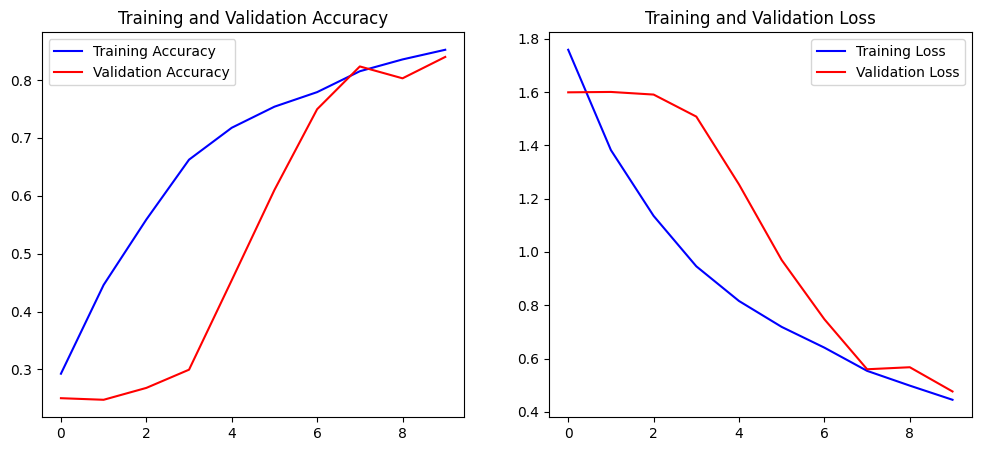

In [45]:
plot_history(eff_history_fine)

In [46]:
# ResNet50
from tensorflow.keras.applications import ResNet50

IMG_SIZE_RES = (224, 224)

train_gen_res = datagen.flow_from_directory(
    datadir,
    target_size=IMG_SIZE_RES,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen_res = datagen.flow_from_directory(
    datadir,
    target_size=IMG_SIZE_RES,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load ResNet50
base_model_res = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model_res.trainable = False

res_model = Sequential([
    base_model_res,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

res_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

res_history = res_model.fit(train_gen_res, epochs=10, validation_data=val_gen_res)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 241ms/step - accuracy: 0.2825 - loss: 1.7550 - val_accuracy: 0.3529 - val_loss: 1.4982
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.3227 - loss: 1.5308 - val_accuracy: 0.4049 - val_loss: 1.4833
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.3482 - loss: 1.5195 - val_accuracy: 0.3844 - val_loss: 1.4669
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.3647 - loss: 1.4906 - val_accuracy: 0.3940 - val_loss: 1.4493
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.3815 - loss: 1.4774 - val_accuracy: 0.4008 - val_loss: 1.4438
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.3802 - loss: 1.4660 - val_accuracy: 0.3844 - val_loss: 1.4474
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.3943 - loss: 1.4520 - val

In [53]:
base_model_res.trainable = True
# مثال: إلغاء تجميد آخر 20 طبقة فقط
for layer in base_model_res.layers[-20:]:
    layer.trainable = True

from tensorflow.keras import optimizers

res_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),  # معدل تعلم منخفض
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_epochs = 10
total_epochs = 10 + fine_tune_epochs  # إذا كنت دربت سابقًا 10 إيبوكات

history_fine = res_model.fit(
    train_gen_res,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],  # الاستمرار من الإيبوك الأخير
    validation_data=val_gen_res
)

In [54]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

#تحميل VGG16 بدون الطبقات العليا (include_top=False):
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
base_model.trainable = False  # تجميد طبقات VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [56]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [58]:
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=[early_stop]
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 298ms/step - accuracy: 0.2761 - loss: 1.5958 - val_accuracy: 0.5732 - val_loss: 1.3174
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.4938 - loss: 1.2999 - val_accuracy: 0.6047 - val_loss: 1.1461
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.6040 - loss: 1.1078 - val_accuracy: 0.6443 - val_loss: 1.0266
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.6477 - loss: 0.9941 - val_accuracy: 0.6717 - val_loss: 0.9489
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - accuracy: 0.6918 - loss: 0.9152 - val_accuracy: 0.6731 - val_loss: 0.8959
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.7103 - loss: 0.8544 - val_accuracy: 0.6977 - val_loss: 0.8462
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - accuracy: 0.7292 - loss: 0.7822 - val_accuracy: 0.7237 - val_loss: 0.8156
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - accuracy: 0.7292 - loss: 0.7918 - val_accu

In [ ]:
# tl_model.save("flower_classification_model.h5")

In [50]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load model
#model = load_model("best_model.h5")

# Define class labels
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Load and preprocess the image
img_path = "/content/Image_8.jpg"
img = image.load_img(img_path, target_size=(180, 180))  # match your input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # create batch dimension
img_array /= 255.0  # normalize if model expects this

# Predict
preds = tl_model.predict(img_array)

# Get predicted class and probabilities
predicted_class = np.argmax(preds[0])
probability = preds[0][predicted_class]
class_probabilities = preds[0]

print(f"Maximum Probability: {probability:.6f}")
print(f"Classified: {class_names[predicted_class].capitalize()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Maximum Probability: 0.995224
Classified: Daisy


In [51]:
# Print Probabilities per Class
# Print formatted output
for i, prob in enumerate(class_probabilities):
    print(f"{class_names[i].upper()} : {prob * 100:.2f} %")

DAISY : 99.52 %
DANDELION : 0.00 %
ROSES : 0.00 %
SUNFLOWERS : 0.00 %
TULIPS : 0.48 %


In [60]:
# Load and preprocess the image
img_path = "/content/Image_8.jpg"
img = image.load_img(img_path, target_size=(180, 180))  # match your input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # create batch dimension
img_array /= 255.0  # normalize if model expects this

# Predict
preds = model.predict(img_array)

# Get predicted class and probabilities
predicted_class = np.argmax(preds[0])
probability = preds[0][predicted_class]
class_probabilities = preds[0]

print(f"Maximum Probability: {probability:.6f}")
print(f"Classified: {class_names[predicted_class].capitalize()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Maximum Probability: 0.983920
Classified: Daisy
